# General scrip to invert the problem of Neutrino Physics

In [1]:
import numpy as np
import pandas as pd
import subprocess
import time

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt 

# PMNS matrix 2018 to $3\sigma$ https://arxiv.org/abs/1708.01186

In [3]:
import NEUTRINO2018
import neutrino_analytic2

In [12]:
mnu1 = NEUTRINO2018.nuexpvalues()['mnu1']
mnu2 = NEUTRINO2018.nuexpvalues()['mnu2']
mnu3 = NEUTRINO2018.nuexpvalues()['mnu3']
U11 = NEUTRINO2018.nuexpvalues()['U11']
U12 = NEUTRINO2018.nuexpvalues()['U12']
U13 = NEUTRINO2018.nuexpvalues()['U13']
U21 = NEUTRINO2018.nuexpvalues()['U21']
U22 = NEUTRINO2018.nuexpvalues()['U22']
U23 = NEUTRINO2018.nuexpvalues()['U23']
U31 = NEUTRINO2018.nuexpvalues()['U31']
U32 = NEUTRINO2018.nuexpvalues()['U32']
U33 = NEUTRINO2018.nuexpvalues()['U33']

print(U22,U23)
print(mnu1,mnu2,mnu3)
print("SUM=",mnu1+mnu2+mnu3)

0.5447346014087859 0.7235355557781601
1e-20 8.632800244709906e-12 4.952485653294833e-11
SUM= 5.815765678765824e-11


$\Lambda_i$ values

In [16]:
#Algoritm to compute LAMBDAi
mS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
mS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
m1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m1']
m2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['m2']
v12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
v22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
u11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
u21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
L1 = neutrino_analytic2.LAMBDA(m1,mS1,v12,u11)+ neutrino_analytic2.LAMBDA(m2,mS1,v22,u21)
L2 = neutrino_analytic2.LAMBDA(m1,mS2,v12,u11)+ neutrino_analytic2.LAMBDA(m2,mS2,v22,u21)

print(L1,L2,m1,m2)

-3.8571433233563065e-06 -3.524085511989297e-06 17.677667870149783 400.0000375505166


WARNING in NEUTRINO2018.nuexpvalues rutine

In [4]:
#!/usr/bin/env python

#Import run_dicctionary.py
#This file run a lot of dicctionaryes to run SPheno

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 1

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MDF = 400.
    MS12 = 8.0E+06
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 2.0E-01    
    vS = 500.
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    #Neutrino experimental values to 3sigma -> WARNING!!!!
    mnu1 = NEUTRINO2018.nuexpvalues()['mnu1']
    mnu2 = NEUTRINO2018.nuexpvalues()['mnu2']
    mnu3 = NEUTRINO2018.nuexpvalues()['mnu3']    
    U11 = NEUTRINO2018.nuexpvalues()['U11']
    U12 = NEUTRINO2018.nuexpvalues()['U12']
    U13 = NEUTRINO2018.nuexpvalues()['U13']
    U21 = NEUTRINO2018.nuexpvalues()['U21']
    U22 = NEUTRINO2018.nuexpvalues()['U22']
    U23 = NEUTRINO2018.nuexpvalues()['U23']
    U31 = NEUTRINO2018.nuexpvalues()['U31']
    U32 = NEUTRINO2018.nuexpvalues()['U32']
    U33 = NEUTRINO2018.nuexpvalues()['U33']
    
    #Algoritm to compute LAMBDAi
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
    #ALGORITM: Particular case(see): inversion-neutrino-matrix.nb
    a11 = 0.0
    a12 = 0.0 
    #Random
    a21 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-4)),np.log(10**(0))))
    #Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    # Modific the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    # Add to the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31 
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32     
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'])
#xd.to_csv('xd_neutrinos.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 0.9785497188568115 s running 1 times


In [33]:
#!/usr/bin/env python

import pyslha
import pySDdiracDM_LesHouches_generator
import numpy as np
import pandas as pd
import subprocess
import time
import sys

# Tiempo inicial
t1=time.time() 

#Open xdict which is now a <PySLHA Doc: 10 blocks, 0 decays, 0 xsections>
xdict = pySDdiracDM_LesHouches_generator.buildSLHAinFile()

x=[]

#times to run the program. Entry using the keyboard
#Num = int(sys.argv[1])
Num = 5

for n in range(0,Num):

    #Random parameters as input  
    #BLOCK MINPAR
    vevSM = 244.874425
    MDF = np.exp(np.random.uniform(np.log(10**(2)),np.log(10**(3))))
    MS12 = 8.0E+06
    MS22 = 9.0E+06
    LamS1H = 0.0E-04
    LamS2H = 0.0E-04
    LamSPH = 0.0E-04
    LamS = 1.0E-04
    LamSP = 2.0E-01    
    vS = np.exp(np.random.uniform(np.log(4*10**(2)),np.log(10**(3))))
    YRD = 1.0E-03
    YRC = 5.0E-02
    
    ###NEUTRINO EXPERIMENTAL VALUES
    #phases of the PMNS matrix and the R 
    phases1 = np.random.uniform(0.,0.0*np.pi,3) # WARNING! They are in zero
    delta = phases1[0]
    eta1 = phases1[1]
    eta2 = phases1[2]
    #light neutrino masses (up 3 sigma range) NH (NO)
    #mnu1 = 10**((np.log10(2.5e-3)-np.log10(1e-9))*np.random.uniform(0,1)+np.log10(1e-9))*1e-9 
    #Zero in this framework
    mnu1 = 1.0e-20
    mnu2 = np.sqrt(np.random.uniform(7.05e-5,8.14e-5)*1e-18+mnu1**2)
    mnu3 = np.sqrt(np.random.uniform(2.41e-3,2.60e-3)*1e-18+mnu1**2)
    #mixing angles (up 3 sigma range) NH
    t12 = np.arcsin(np.sqrt(np.random.uniform(0.273,0.379)))
    t23 = np.arcsin(np.sqrt(np.random.uniform(0.445,0.599)))
    t13 = np.arcsin(np.sqrt(np.random.uniform(0.0196,0.0241)))
    #Building PMNS matrix NH
    UM12 = np.array([ [np.cos(t12),np.sin(t12),0.], [-np.sin(t12),np.cos(t12),0.], [0.,0.,1.0] ])
    UM13 = np.array([ [np.cos(t13),0.,np.sin(t13)], [0.,1.0,0.], [-np.sin(t13),0.,np.cos(t13)] ])
    UM23 = np.array([ [1.0,0.,0.], [0.,np.cos(t23),np.sin(t23)], [0.,-np.sin(t23),np.cos(t23)] ])
    Uphases = np.array([ [np.exp(eta1*1j),0.,0.], [0.,np.exp(eta2*1j),0.], [0.,0.,1.0] ])
    U=np.dot(UM23,np.dot(UM13,np.dot(UM12,Uphases)))
    #Defining the U elementes. readeable
    U11 = np.real(U[0,0])
    U12 = np.real(U[0,1])
    U13 = np.real(U[0,2])
    U21 = np.real(U[1,0])
    U22 = np.real(U[1,1])
    U23 = np.real(U[1,2])
    U31 = np.real(U[2,0])
    U32 = np.real(U[2,1])
    U33 = np.real(U[2,2])
    
    #Algoritm to compute LAMBDAi
    MS1 = np.sqrt(LamS1H*vevSM**2/2.+MS12)
    MS2 = np.sqrt(LamS2H*vevSM**2/2.+MS22)
    M1 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M1']
    M2 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['M2']
    vv12 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V12']
    vv22 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['V22']
    uu11 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U11']
    uu21 = neutrino_analytic2.MATRIXCHIDIAG(MDF,vS,YRC,YRD)['U21']
    L1 = neutrino_analytic2.LAMBDA(M1,MS1,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS1,vv22,uu21)
    L2 = neutrino_analytic2.LAMBDA(M1,MS2,vv12,uu11)+ neutrino_analytic2.LAMBDA(M2,MS2,vv22,uu21)
    
    #ALGORITM: Particular case(see): inversion-neutrino-matrix.nb
    a11 = 0.0
    a12 = 0.0 
    #Random
    a21 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0))))
    a22 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0))))
    a31 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0))))    
    a32 = np.exp(np.random.uniform(np.log(10**(-3)),np.log(10**(0))))
    #Solved in Mathematica
    b11 = -((a32*mnu2*U12 - a22*mnu3*U13)/(a22*a31*L1 - a21*a32*L1))   
    b21 = -((a32*mnu2*U22 - a22*mnu3*U23)/(a22*a31*L1 - a21*a32*L1))
    b31 = -((a32*mnu2*U32 - a22*mnu3*U33)/(a22*a31*L1 - a21*a32*L1))
    b12 = (a31*mnu2*U12 - a21*mnu3*U13)/(a22*a31*L2 - a21*a32*L2)
    b22 = (a31*mnu2*U22 - a21*mnu3*U23)/(a22*a31*L2 - a21*a32*L2)
    b32 = (a31*mnu2*U32 - a21*mnu3*U33)/(a22*a31*L2 - a21*a32*L2)
    
    # Modific the LesHouches file   
    xdict.blocks['MINPAR'].entries[2]='%.7E    # MDFInput' %MDF
    xdict.blocks['MINPAR'].entries[3]='%.7E    # MS12Input' %MS12
    xdict.blocks['MINPAR'].entries[4]='%.7E    # MS22Input' %MS22
    xdict.blocks['MINPAR'].entries[5]='%.7E    # LamS1HInput' %LamS1H
    xdict.blocks['MINPAR'].entries[6]='%.7E    # LamS2HInput' %LamS2H
    xdict.blocks['MINPAR'].entries[7]='%.7E    # LamSPHInput' %LamSPH
    xdict.blocks['MINPAR'].entries[8]='%.7E    # LamSInput' %LamS
    xdict.blocks['MINPAR'].entries[9]='%.7E    # LamSPInput' %LamSP
    xdict.blocks['MINPAR'].entries[10]='%.7E    # vSInput' %vS
    xdict.blocks['MINPAR'].entries[11]='%.7E    # YRDInput' %YRD
    xdict.blocks['MINPAR'].entries[12]='%.7E    # YRCInput' %YRC
    
    # Add to the LesHouches file 
    xdict.blocks['YRA1IN'].entries[1]='%.6E    # YRA1(1)' %a11  
    xdict.blocks['YRA1IN'].entries[2]='%.6E    # YRA1(2)' %a21    
    xdict.blocks['YRA1IN'].entries[3]='%.6E    # YRA1(3)' %a31 
    
    xdict.blocks['YRA2IN'].entries[1]='%.6E    # YRA2(1)' %a12  
    xdict.blocks['YRA2IN'].entries[2]='%.6E    # YRA2(2)' %a22     
    xdict.blocks['YRA2IN'].entries[3]='%.6E    # YRA2(3)' %a32     
    
    xdict.blocks['YRB1IN'].entries[1]='%.6E    # YRB1(1)' %b11  
    xdict.blocks['YRB1IN'].entries[2]='%.6E    # YRB1(2)' %b21     
    xdict.blocks['YRB1IN'].entries[3]='%.6E    # YRB1(3)' %b31 
    
    
    xdict.blocks['YRB2IN'].entries[1]='%.6E    # YRB2(1)' %b12  
    xdict.blocks['YRB2IN'].entries[2]='%.6E    # YRB2(2)' %b22     
    xdict.blocks['YRB2IN'].entries[3]='%.6E    # YRB2(3)' %b32      
    
    #Write the Leshouches file
    pyslha.writeSLHAFile('LesHouches.in.SDdiracDM_low',xdict)
    
    #run SPheno
    spheno = subprocess.getoutput('../.././SPheno-4.0.3/bin/SPhenoSDdiracDM LesHouches.in.SDdiracDM_low')
    SPheno_output = subprocess.getoutput('cat SPheno.spc.SDdiracDM')
    
    mh1 = eval(SPheno_output.split('Block MASS')[1].split()[9])
    mh2 = eval(SPheno_output.split('Block MASS')[1].split()[13])  
    
    ##++++++++++ Neutrinos +++++++++++++++++++++++++++++++++
    if SPheno_output.split('# Fe_3')[1].split()[1] == "NaN":
        mv1 = 0.
    else: 
        mv1 = eval(SPheno_output.split('# Fe_3')[1].split()[1])            
    mv2 = eval(SPheno_output.split('# Fe_3')[1].split()[5])       
    mv3 = eval(SPheno_output.split('# Fe_3')[1].split()[9])    
    
    mS1 = eval(SPheno_output.split('# Fe_3')[1].split()[13])
    mS2 = eval(SPheno_output.split('# Fe_3')[1].split()[17])

    mCha = eval(SPheno_output.split('# Fe_3')[1].split()[21])
    mChi1 = eval(SPheno_output.split('# Fe_3')[1].split()[25])
    mChi2 = eval(SPheno_output.split('# Fe_3')[1].split()[29])
    
    XV11 = eval(SPheno_output.split('Block XV')[1].split()[6])
    XV12 = eval(SPheno_output.split('Block XV')[1].split()[11])
    XV21 = eval(SPheno_output.split('Block XV')[1].split()[16])
    XV22 = eval(SPheno_output.split('Block XV')[1].split()[21])
    
    XU11 = eval(SPheno_output.split('Block XU')[1].split()[6])
    XU12 = eval(SPheno_output.split('Block XU')[1].split()[11])
    XU21 = eval(SPheno_output.split('Block XU')[1].split()[16])
    XU22 = eval(SPheno_output.split('Block XU')[1].split()[21])
    vevSM = eval(SPheno_output.split('Block HMIX')[1].split()[6])

    x.append([MDF,MS12,MS22,LamS1H,LamS2H,LamSPH,LamS,LamSP,vS,YRD,YRC,a11,a21,a31,a12,a22,a32,\
              b11,b21,b31,b12,b22,b32,mh1,mh2,mv3,mv2,mv1,mS1,mS2,mCha,mChi1,mChi2,\
              XV11,XV12,XV21,XV22,XU11,XU12,XU21,XU22,vevSM])
    
x=np.asarray(x)
xd=pd.DataFrame(x,columns=['MDF','MS12','MS22','LamS1H','LamS2H','LamSPH','LamS','LamSP','vS','YRD'\
                           ,'YRC','YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13'\
                           ,'YRB21','YRB22','YRB23','mh1','mh2','mv3','mv2','mv1','mS1','mS2','mCha'\
                           ,'mChi1','mChi2','XV11','XV12','XV21','XV22','XU11','XU12','XU21','XU22','vevSM'])
#xd.to_csv('xd_neutrinos.csv')

t4=time.time() 
print ("The program spent", t4-t1, "s running",Num,"times")    

The program spent 4.637748718261719 s running 5 times


In [34]:
xd[['YRA11','YRA12','YRA13','YRA21','YRA22','YRA23','YRB11','YRB12','YRB13','YRB21','YRB22','YRB23']]

,YRA11,YRA12,YRA13,YRA21,YRA22,YRA23,YRB11,YRB12,YRB13,YRB21,YRB22,YRB23
0,0.0,0.192787,0.032354,0.0,0.139864,0.474749,-0.000002,0.000004,0.000012,-0.000002,-1.104278e-05,-0.000012
1,0.0,0.012109,0.115916,0.0,0.900891,0.098191,-0.000026,-0.000131,-0.000149,-0.000002,-6.844361e-07,0.000005
2,0.0,0.046595,0.191006,0.0,0.059406,0.005997,-0.000010,-0.000046,-0.000047,-0.000014,1.911275e-05,0.000066
3,0.0,0.016204,0.004232,0.0,0.908894,0.634669,0.000161,0.001117,0.001517,-0.000005,-2.341809e-05,-0.000028
4,0.0,0.020566,0.256483,0.0,0.002474,0.132904,-0.000095,-0.000089,0.000132,0.000182,9.315904e-05,-0.000383


In [35]:
print("Experimental values   :",mnu2,mnu3)
print(" ")
print("Inversion-SPHENO      :",mv2,mv3)

Experimental values   : 8.691521085875006e-12 5.073194363998602e-11
 
Inversion-SPHENO      : 8.69152169e-12 5.07319763e-11


In [36]:
print("RUTINE: ",'%.5f' %M1, '%.5f' %M2)
#
print("SPEHENO:",'%.5f' %mChi1 , '%.5f' %mChi2)

RUTINE:  22.85208 171.08505
SPEHENO: 22.85208 171.08505


In [38]:
(xd.YRB11*L1*xd.YRA11+xd.YRB21*L2*xd.YRA21)+(xd.YRB12*L1*xd.YRA11+xd.YRB22*L2*xd.YRA21)\
+(xd.YRB13*L1*xd.YRA11+xd.YRB23*L2*xd.YRA21)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

# Analytical diagonalization rutine for Neutrino mass matriz

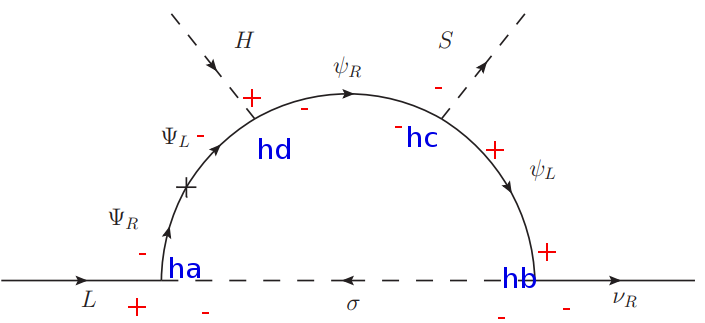

In [39]:
from IPython.display import Image
Image("/home/anferivera/Dropbox/SingletDoubletDirac/draft_SDdiracDM/figures/neutrino-GB.png", width=500)

TWO DIRAC FERMIONS IN THE LOOP:

\begin{align}
\mathcal{M}_{\alpha\beta}= \sum_{i=1}^2\sum_{k=1}^2
\dfrac{V_{k2}U_{k1}}{16\pi^2}
\times b_{\alpha i} a_{\beta i} m_{N_k} 
\times \left[\dfrac{m_{N_k}^2}{\left(m_{N_k}^2-m_{S_i}^2\right)}\ln{\left(\dfrac{m_{N_k}^2}{m_{S_i}^2}\right)}\right]\,.
\end{align}

Import the analytical rutine for compute the $\mathcal{M}_{\alpha\beta}$ version two

Example:

In [40]:
#Add to the DataFrame
xd['mn1'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[0]
xd['mn2'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[1]
xd['mn3'] = neutrino_analytic2.MatrixDiag_new(xd.YRB11,xd.YRB12,xd.YRB13,xd.YRB21,xd.YRB22,xd.YRB23,\
   xd.YRA11,xd.YRA12,xd.YRA13,xd.YRA21,xd.YRA22,xd.YRA23,xd.mS1,xd.mS2,xd.MDF,xd.vS,xd.YRC,xd.YRD,xd.vevSM)[2]

In [41]:
##WARNING: The vev change in SPheno
xd[['mv1','mn1','mv2','mn2','mv3','mn3']]

,mv1,mn1,mv2,mn2,mv3,mn3
0,0.000000e+00,4.336809e-19,8.754479e-12,8.754484e-12,5.004516e-11,5.004517e-11
1,0.000000e+00,4.336809e-19,8.526843e-12,8.526842e-12,5.037617e-11,5.037616e-11
2,2.616147e-19,0.000000e+00,8.701509e-12,8.701510e-12,4.979099e-11,4.979099e-11
3,3.881599e-19,0.000000e+00,8.557454e-12,8.557460e-12,5.023603e-11,5.023601e-11
4,0.000000e+00,4.336809e-19,8.691522e-12,8.691521e-12,5.073198e-11,5.073194e-11
